In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [2]:
nb_iters = 300
lrn_rate = 0.1
beta1 = 0.95
beta2 = 0.999
eps = 0.00000001

In [3]:
class Adam(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta2) * g ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))
        x_new = x - self.lrn_rate * m_adj / np.sqrt(v_adj + self.eps)
        return x_new


In [4]:
class diffGrad(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order
        self.g_prev = 0.0

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta2) * g ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))
        dfc = 1.0 / (1.0 + np.exp(-np.abs(self.g_prev - g)))
        x_new = x - self.lrn_rate * m_adj * dfc / (np.sqrt(v_adj) + self.eps)
        self.g_prev = g
        return x_new

In [5]:
class SWOSBC(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order
        self.x_prev = 0.0
        self.x_new=0.0

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta1) * g ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        dfc = 1.0 / (1.0 + np.sqrt(np.abs(self.m )))
        #dfc = 1.0 / (1.0 + np.sqrt(np.abs(self.x_prev - x)))
        x_new = x - self.lrn_rate * m_adj * dfc / ( np.sqrt(self.v) + self.eps)
        x_prev = x
        return x_new


In [6]:
class AdaBelief(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta2) * (g - self.m) ** 2 + self.eps
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))
        x_new = x - self.lrn_rate * m_adj / np.sqrt(v_adj + self.eps)
        return x_new


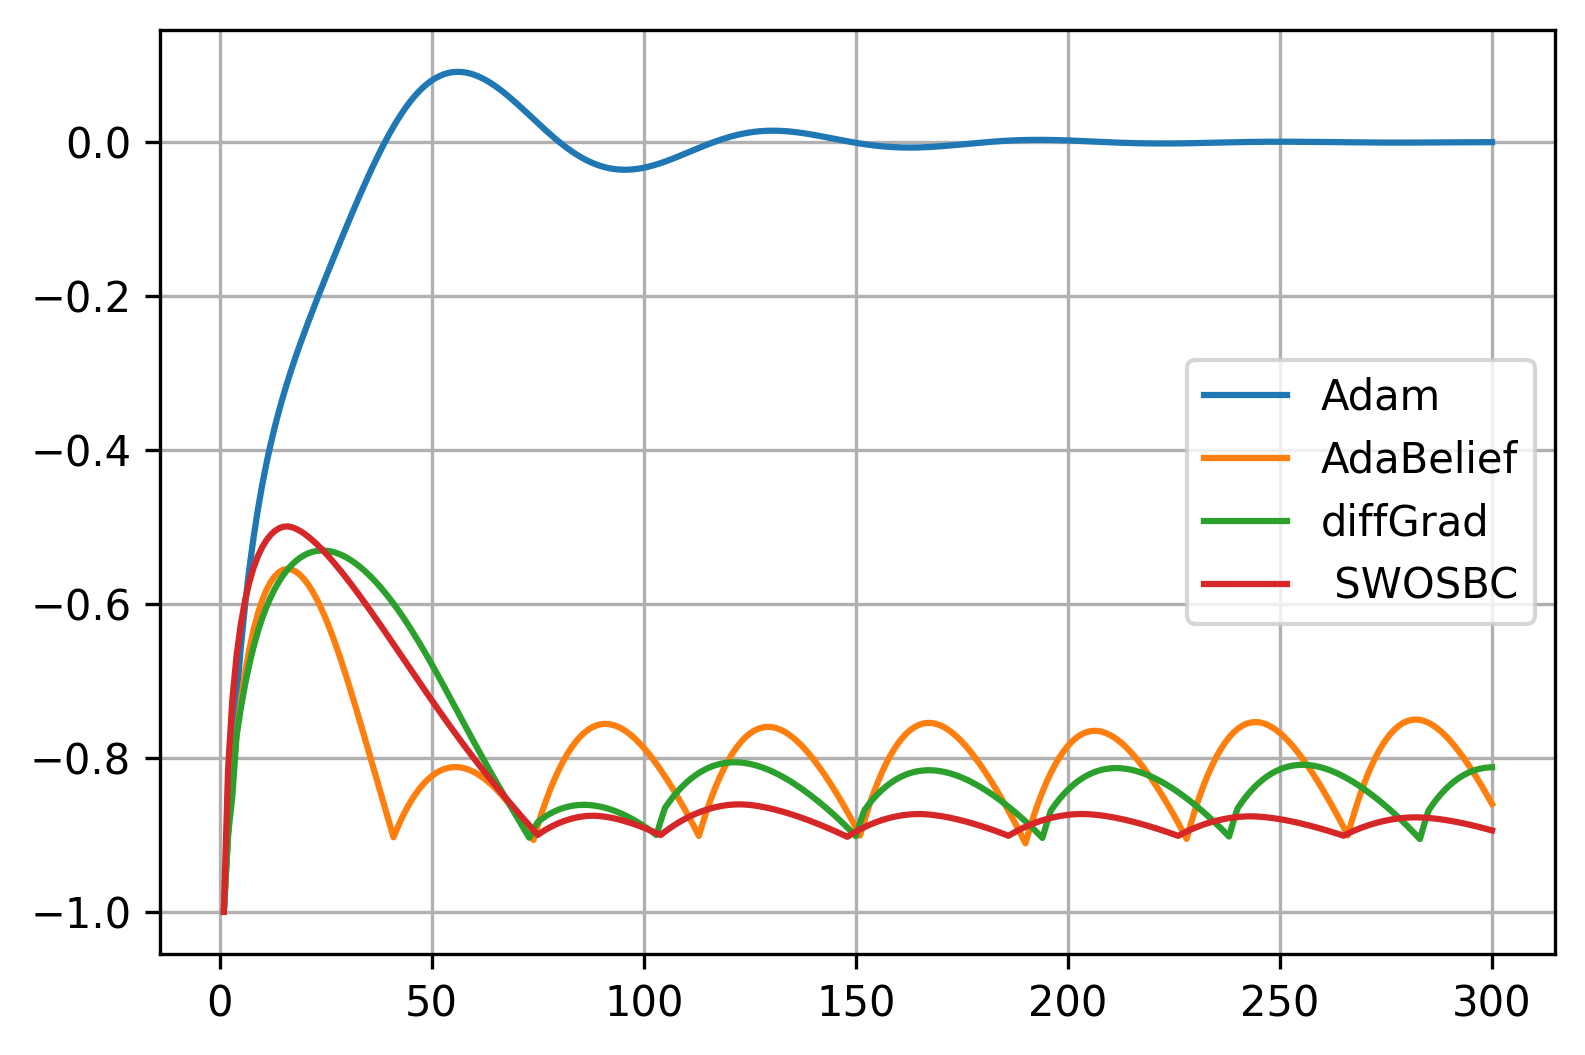

In [7]:
def calc_grad(x):
    if x <= -0.9:
        return -40
    else:
        return x * mt.cos(8 * x) + mt.sin(8 * x) + 3 * x * x

# optimize with the specified solver
def solve(x0, solver):
    x = np.zeros(nb_iters)
    x[0] = x0
    for idx_iter in range(1, nb_iters):
        g = calc_grad(x[idx_iter - 1])
        x[idx_iter] = solver.update(x[idx_iter - 1], g)
    return x

# Adam & diffGrad
x = {}
x0 = -1.0
solver = Adam(lrn_rate, beta1, beta2, eps)
x['adam'] = solve(x0, solver)
solver = AdaBelief(lrn_rate, beta1, beta2, eps)
x['AdaBelief'] = solve(x0, solver)
solver = diffGrad(lrn_rate, beta1, beta2, eps)
x['diffGrad'] = solve(x0, solver)
solver = SWOSBC(lrn_rate, beta1, beta2, eps)
x['SWOSBC'] = solve(x0, solver)
# visualization
plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.plot(np.arange(nb_iters) + 1, x['adam'], label='Adam')
plt.plot(np.arange(nb_iters) + 1, x['AdaBelief'], label='AdaBelief')
plt.plot(np.arange(nb_iters) + 1, x['diffGrad'], label='diffGrad')
plt.plot(np.arange(nb_iters) + 1, x['SWOSBC'], label=' SWOSBC')
plt.legend()
plt.grid()
plt.show()

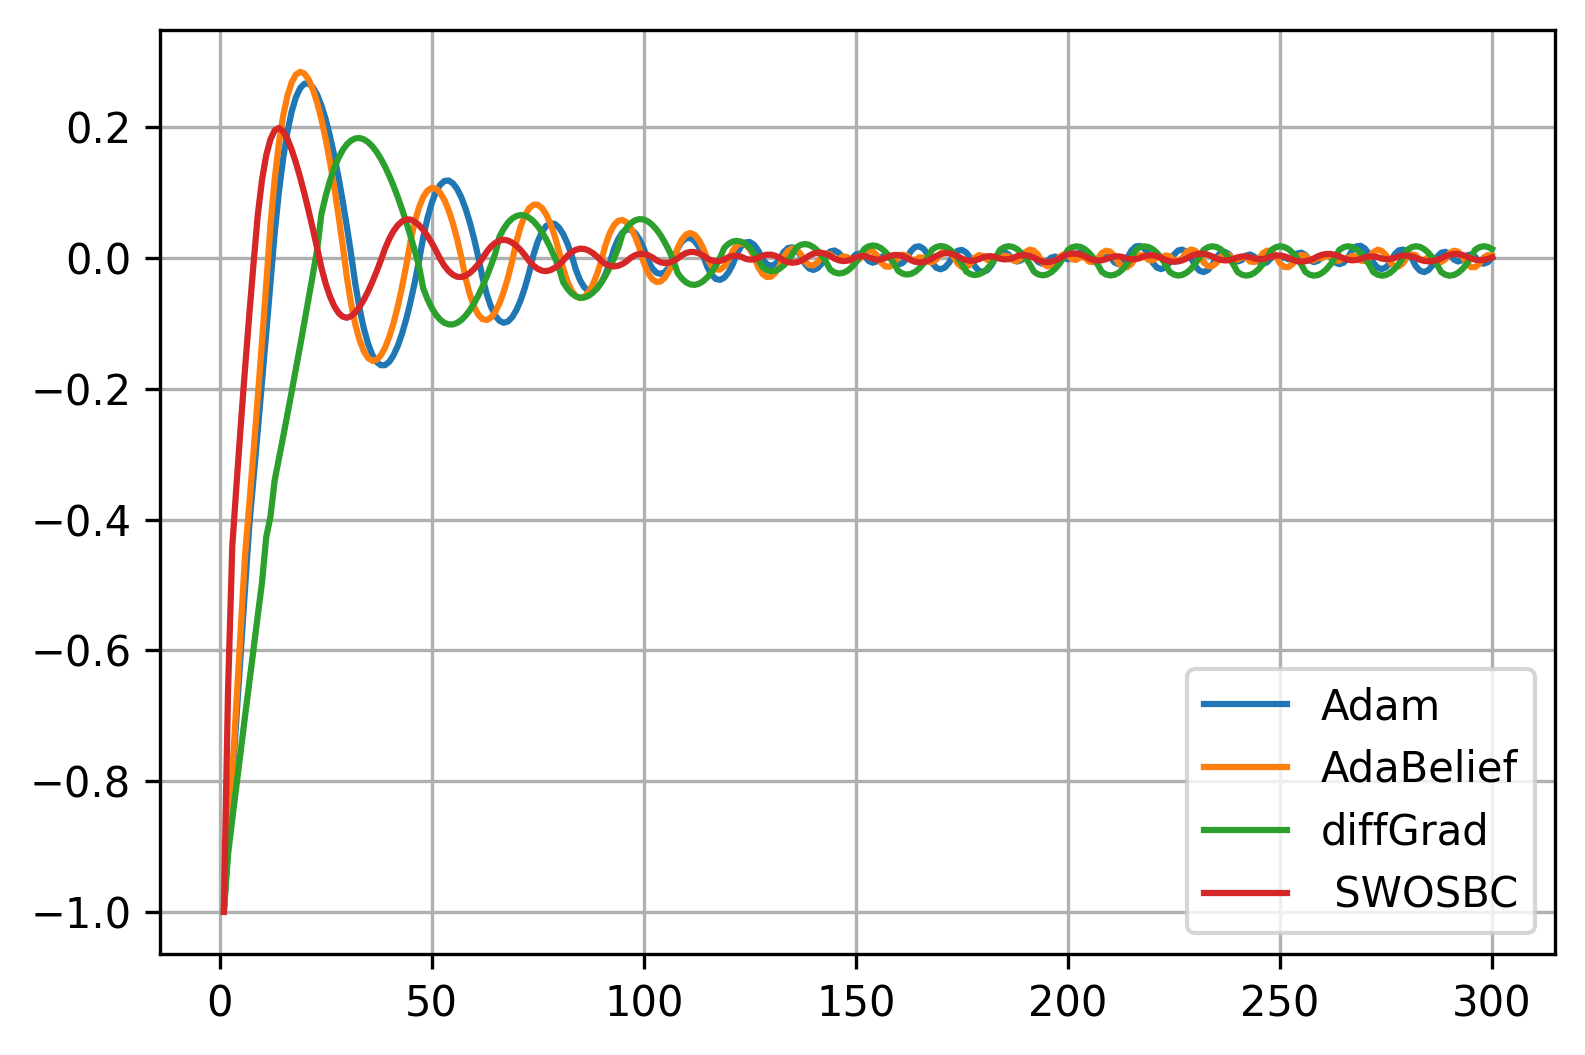

In [8]:
def calc_grad(x):
    if x <= -0.5:
        return 2 * x
    elif x <= -0.4:
        return 1.0
    elif x <= 0.0:
        return -7/8
    elif x <= 0.4:
        return 7/8
    elif x <= 0.5:
        return -1.0
    else:
        return 2 * x

# optimize with the specified solver
def solve(x0, solver):
    x = np.zeros(nb_iters)
    x[0] = x0
    for idx_iter in range(1, nb_iters):
        g = calc_grad(x[idx_iter - 1])
        x[idx_iter] = solver.update(x[idx_iter - 1], g)
    return x

# Adam & diffGrad AdaBelief
x = {}
x0 = -1.0
solver = Adam(lrn_rate, beta1, beta2, eps)
x['adam'] = solve(x0, solver)
solver = AdaBelief(lrn_rate, beta1, beta2, eps)
x['AdaBelief'] = solve(x0, solver)
solver = diffGrad(lrn_rate, beta1, beta2, eps)
x['diffGrad'] = solve(x0, solver)
solver = SWOSBC(lrn_rate, beta1, beta2, eps)
x['SWOSBC'] = solve(x0, solver)
# visualization
plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.plot(np.arange(nb_iters) + 1, x['adam'], label='Adam')
plt.plot(np.arange(nb_iters) + 1, x['AdaBelief'], label='AdaBelief')
plt.plot(np.arange(nb_iters) + 1, x['diffGrad'], label='diffGrad')
plt.plot(np.arange(nb_iters) + 1, x['SWOSBC'], label=' SWOSBC')
plt.legend()
plt.grid()
plt.show()